In [37]:
from qiskit import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# define oracle
oracle = QuantumCircuit(4, name='oracle')
# 0101
oracle.x(0)
oracle.x(2)

oracle.h(3)
oracle.mct([0, 1, 2], 3)
oracle.h(3)

oracle.x(0)
oracle.x(2)

# 0111
oracle.x(0)
oracle.h(3)
oracle.mct([0, 1, 2], 3)
oracle.h(3)
oracle.x(0)

oracle.to_gate()
oracle.draw()

C:\Users\zrz11\AppData\Local\Temp\ipykernel_30628\2230923687.py:8: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  oracle.mct([0, 1, 2], 3)
C:\Users\zrz11\AppData\Local\Temp\ipykernel_30628\2230923687.py:17: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  oracle.mct([0, 1, 2], 3)


┌───┐     ┌───┐┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├
     └───┘  │  └───┘└───┘  │  └───┘
q_1: ───────■──────────────■───────
     ┌───┐  │  ┌───┐       │       
q_2: ┤ X ├──■──┤ X ├───────■───────
     ├───┤┌─┴─┐├───┤┌───┐┌─┴─┐┌───┐
q_3: ┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘

In [44]:
qc = QuantumCircuit(4,4)
qc.h([0,1,2,3])
qc.append(oracle, [0,1,2,3])

job = execute(qc, Aer.get_backend('statevector_simulator'))
result = job.result()
out_state = result.get_statevector()
print(out_state)

Statevector([ 0.25+0.000000e+00j,  0.25+0.000000e+00j,  0.25-3.061617e-17j,
              0.25+0.000000e+00j,  0.25+0.000000e+00j,  0.25+0.000000e+00j,
              0.25-3.061617e-17j,  0.25+0.000000e+00j,  0.25+0.000000e+00j,
              0.25+0.000000e+00j, -0.25+3.061617e-17j,  0.25+0.000000e+00j,
              0.25+0.000000e+00j,  0.25+0.000000e+00j, -0.25+3.061617e-17j,
              0.25+0.000000e+00j],
            dims=(2, 2, 2, 2))


In [45]:
reflection = QuantumCircuit(4, name='reflection')
reflection.h([0,1,2,3])
reflection.x([0,1,2,3])
reflection.h(3)
reflection.mct([0, 1, 2], 3)  # Multi-controlled Toffoli
reflection.h(3)
reflection.x([0,1,2,3])
reflection.h([0,1,2,3])
reflection.draw()

C:\Users\zrz11\AppData\Local\Temp\ipykernel_30628\1031450679.py:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  reflection.mct([0, 1, 2], 3)  # Multi-controlled Toffoli


┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘

In [46]:
qc.append(reflection, [0,1,2,3])
qc.measure([0,1,2,3],[0,1,2,3])
qc.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐         
q_0: ┤ H ├┤0        ├┤0            ├┤M├─────────
     ├───┤│         ││             │└╥┘┌─┐      
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├──────
     ├───┤│  oracle ││  reflection │ ║ └╥┘┌─┐   
q_2: ┤ H ├┤2        ├┤2            ├─╫──╫─┤M├───
     ├───┤│         ││             │ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤3        ├┤3            ├─╫──╫──╫─┤M├
     └───┘└─────────┘└─────────────┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════╩══╩══╩══╩═
                                     0  1  2  3

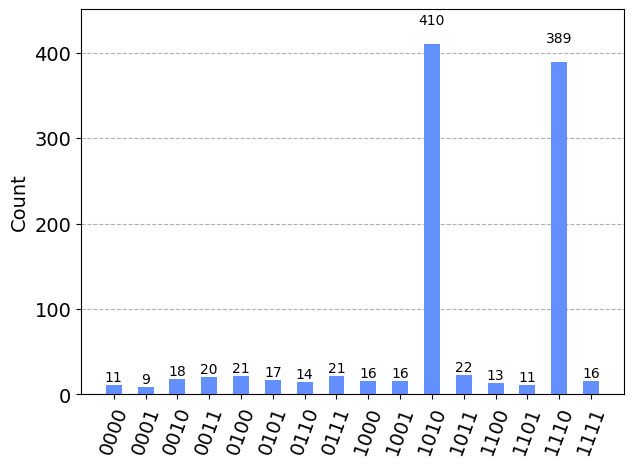

In [47]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)